<a href="https://www.kaggle.com/code/ahmnazmul/detect-ai-generated-faces-high-quality-dataset?scriptVersionId=217437748" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

AI-Generated Images:


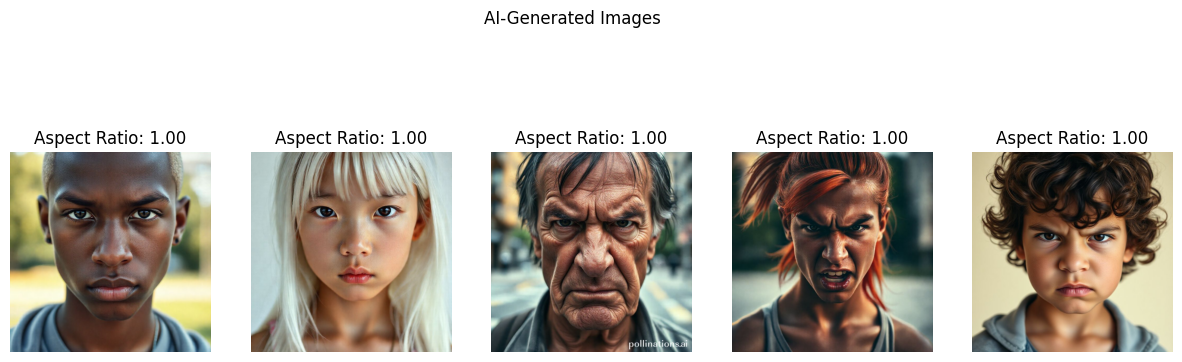

Total images processed: 5
Garbage files detected: 0
Aspect Ratios: [1.0, 1.0, 1.0, 1.0, 1.0]

Real Images:


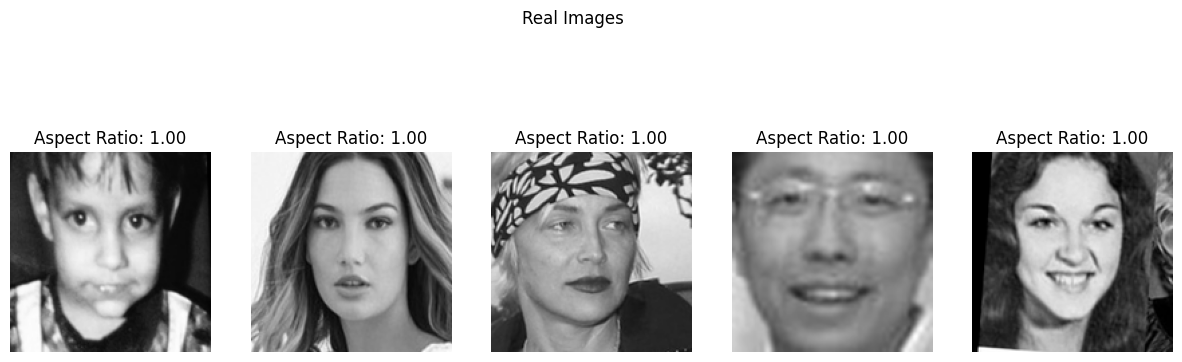

Total images processed: 5
Garbage files detected: 0
Aspect Ratios: [1.0, 1.0, 1.0, 1.0, 1.0]


In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# DATA PATH
ai_image_dir = r"/kaggle/input/detect-ai-generated-faces-high-quality-dataset/AI-face-detection-Dataset/AI"
real_image_dir = r"/kaggle/input/detect-ai-generated-faces-high-quality-dataset/AI-face-detection-Dataset/real"

# FUNCTION TO PLOT 5 IMAGE TO DIR
def display_images_from_dir(directory, title, max_images=5):
    images = []
    aspect_ratios = []
    garbage_count = 0
    fig, axes = plt.subplots(1, max_images, figsize=(15, 5))
    
    for idx, filename in enumerate(os.listdir(directory)):
        if idx >= max_images:
            break
        filepath = os.path.join(directory, filename)
        try:
            with Image.open(filepath) as img:
                images.append(img)
                width, height = img.size
                aspect_ratios.append(width / height)
                axes[idx].imshow(img)
                axes[idx].axis("off")
                axes[idx].set_title(f"Aspect Ratio: {width/height:.2f}")
        except Exception as e:
            print(f"Error with file {filename}: {e}")
            garbage_count += 1

    plt.suptitle(title)
    plt.show()

    print(f"Total images processed: {min(len(os.listdir(directory)), max_images)}")
    print(f"Garbage files detected: {garbage_count}")
    print(f"Aspect Ratios: {aspect_ratios}")

#DISPLAY IMAGES AND CHECK ASPECT RATIOS FOR AI GENERATED IMAGES 
print("AI-Generated Images:")
display_images_from_dir(ai_image_dir, "AI-Generated Images")

# DISPLAY IMAGES AND CHECK ASPECT RATIOS FOR REAL IMAGES
print("\nReal Images:")
display_images_from_dir(real_image_dir, "Real Images")



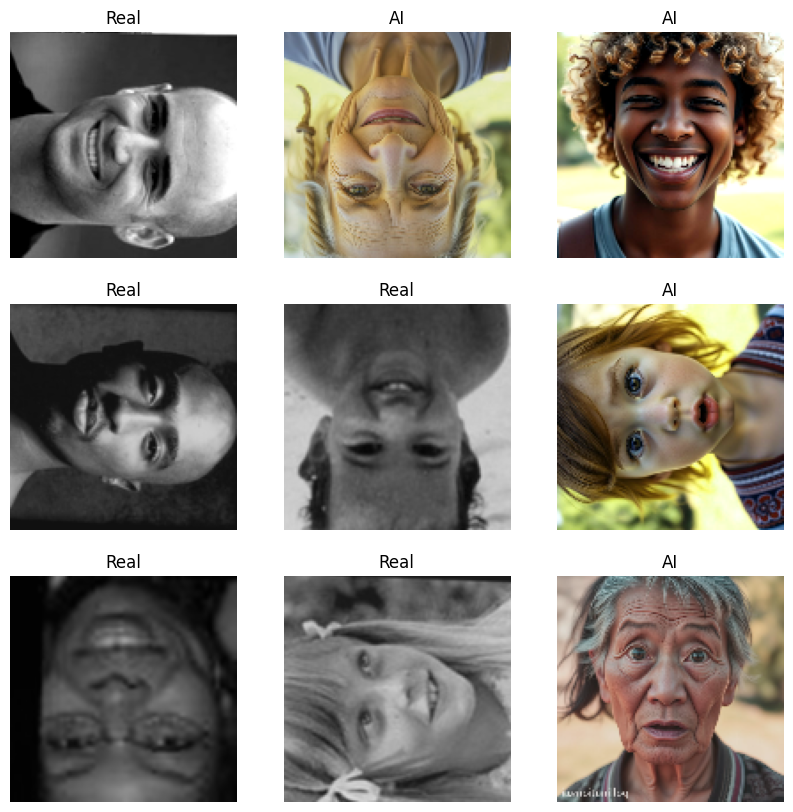

In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# DATA PATHS
ai_image_dir = r"/kaggle/input/detect-ai-generated-faces-high-quality-dataset/AI-face-detection-Dataset/AI"
real_image_dir = r"/kaggle/input/detect-ai-generated-faces-high-quality-dataset/AI-face-detection-Dataset/real"

# FUNCTION TO LOAD AND PREPROCESS IMAGE
def preprocess_image(image_path, target_size=(128, 128)):
    
    # READ AND DECODE THE IMAGE
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    
    #RESIZE WHILE MAINTAINING ASPECT RATIO AND PADDING 
    image = tf.image.resize_with_pad(image, target_size[0], target_size[1])
    
    # DATA AUGMENTATION
    image = tf.image.random_flip_left_right(image)  # Random horizontal flip
    image = tf.image.random_flip_up_down(image)    # Random vertical flip
    image = tf.image.random_brightness(image, max_delta=0.2)  # Brightness adjustment
    image = tf.image.random_contrast(image, lower=0.7, upper=1.3)  # Contrast adjustment
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)  # Saturation adjustment
    image = tf.image.random_hue(image, max_delta=0.05)  # Hue adjustment
    image = tf.image.rot90(image, k=np.random.randint(0, 4))  # Random rotation
    
    # NORMALIZE TO [0, 1]
    image = image / 255.0
    
    return image

# FUNCTION TO LOAD IMAGES FROM DIRECTORY AND PREPROCESS THEM
def load_and_preprocess_images(image_dir, target_size=(128, 128)):
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith(('.jpg', '.jpeg', '.png'))]
    images = [preprocess_image(image_path, target_size) for image_path in image_paths]
    return images

# LOAD AND PREPROCESS AI-GENERATED IMAGES
ai_images = load_and_preprocess_images(ai_image_dir)
ai_labels = np.ones(len(ai_images))  # Label set 1 for AI-generated images

# LOAD AND PREPROCESS REAL IMAGES
real_images = load_and_preprocess_images(real_image_dir)
real_labels = np.zeros(len(real_images))  # Label set 0 for real images

# COMBINE AI-GENERATED AND REAL IMAGES
images = ai_images + real_images
labels = np.concatenate([ai_labels, real_labels])

# CONVERT IMAGES AND LABELS TO NUMPY ARRAYS
images = np.array(images)
labels = np.array(labels)

# SHUFFLE IMAGES AND LABELS
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

# SHOW A FEW PREPROCESSED IMAGES
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title("AI" if labels[i] == 1 else "Real")
    plt.axis('off')
plt.show()


In [3]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# DATA PATHS
ai_image_dir = r"/kaggle/input/detect-ai-generated-faces-high-quality-dataset/AI-face-detection-Dataset/AI"
real_image_dir = r"/kaggle/input/detect-ai-generated-faces-high-quality-dataset/AI-face-detection-Dataset/real"

# FUNCTION TO LOAD AND PREPROCESS IMAGE
def preprocess_image(image_path, target_size=(128, 128)):
    # Read and decode the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    
    #RESIZE WHILE MAINTAINING ASPECT RATIO AND PADDING 
    image = tf.image.resize_with_pad(image, target_size[0], target_size[1])
    
    # DATA AUGMENTATION
    image = tf.image.random_flip_left_right(image)  # Random horizontal flip
    image = tf.image.random_flip_up_down(image)    # Random vertical flip
    image = tf.image.random_brightness(image, max_delta=0.2)  # Brightness adjustment
    image = tf.image.random_contrast(image, lower=0.7, upper=1.3)  # Contrast adjustment
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)  # Saturation adjustment
    image = tf.image.random_hue(image, max_delta=0.05)  # Hue adjustment
    image = tf.image.rot90(image, k=np.random.randint(0, 4))  # Random rotation
    
    # NORMALIZE TO [0, 1]
    image = image / 255.0
    
    return image

# FUNCTION TO LOAD IMAGES FROM DIRECTORY AND PREPROCESS THEM
def load_and_preprocess_images(image_dir, target_size=(128, 128)):
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith(('.jpg', '.jpeg', '.png'))]
    images = [preprocess_image(image_path, target_size) for image_path in image_paths]
    return images

# LOAD AND PREPROCESS AI-GENERATED IMAGES
ai_images = load_and_preprocess_images(ai_image_dir)
ai_labels = np.ones(len(ai_images))  # Label set 1 for AI-generated images

# LOAD AND PREPROCESS REAL IMAGES
real_images = load_and_preprocess_images(real_image_dir)
real_labels = np.zeros(len(real_images))  # Label set 0 for real images

# COMBINE AI-GENERATED AND REAL IMAGES
images = ai_images + real_images
labels = np.concatenate([ai_labels, real_labels])

# CONVERT IMAGES AND LABELS TO NUMPY ARRAYS
images = np.array(images)
labels = np.array(labels)

# SHUFFLE IMAGES AND LABELS
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

from sklearn.model_selection import train_test_split

# SPLIT DATA INTO TRAIN AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# PRINT INPUT SHAPE
print("Training set - Images shape:", X_train.shape, "Labels shape:", y_train.shape)
print("Testing set - Images shape:", X_test.shape, "Labels shape:", y_test.shape)

Training set - Images shape: (2562, 128, 128, 3) Labels shape: (2562,)
Testing set - Images shape: (641, 128, 128, 3) Labels shape: (641,)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.9265 - loss: 0.1963 - val_accuracy: 0.9969 - val_loss: 0.0093
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 322s 3s/step - accuracy: 0.9997 - loss: 0.0043 - val_accuracy: 0.9969 - val_loss: 0.0082
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9984 - val_loss: 0.0032
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 1.0000 - loss: 3.8205e-04 - val_accuracy: 0.9984 - val_loss: 0.0024
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9969 - val_loss: 0.0053
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.9997 - loss: 0.0018 - val_accuracy: 0.9969 - val_loss: 0.0058
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - acc

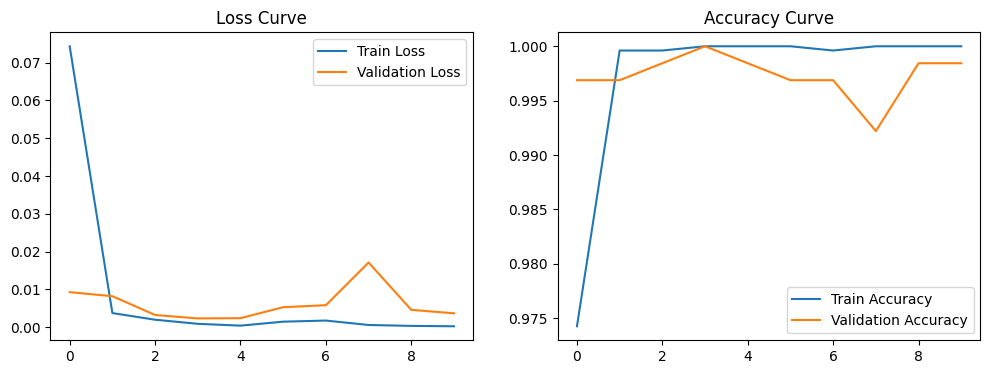

21/21 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step


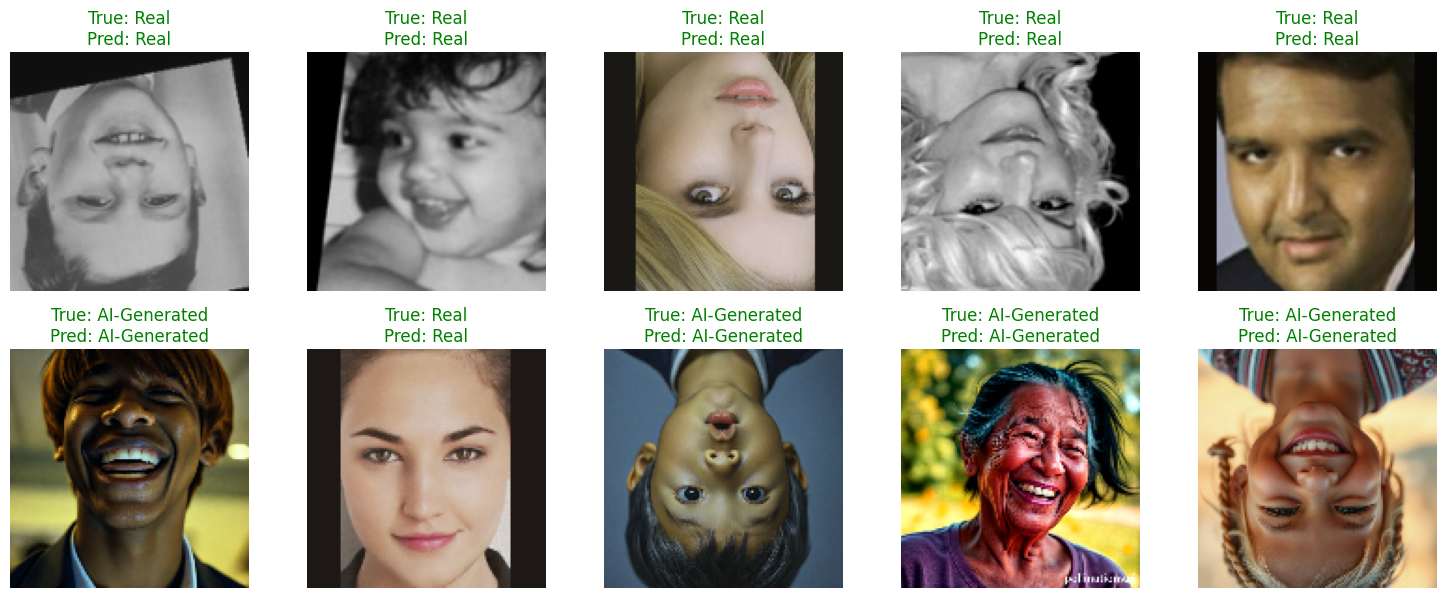

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# DATA PATHS
ai_image_dir = r"/kaggle/input/detect-ai-generated-faces-high-quality-dataset/AI-face-detection-Dataset/AI"
real_image_dir = r"/kaggle/input/detect-ai-generated-faces-high-quality-dataset/AI-face-detection-Dataset/real"

# FUNCTION TO LOAD AND PREPROCESS IMAGE
def preprocess_image(image_path, target_size=(128, 128)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize_with_pad(image, target_size[0], target_size[1])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.7, upper=1.3)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
    image = tf.image.random_hue(image, max_delta=0.05)
    image = tf.clip_by_value(image, 0.0, 255.0) / 255.0
    return image

# FUNCTION TO LOAD IMAGES FROM DIRECTORY AND PREPROCESS THEM
def load_and_preprocess_images(image_dir, target_size=(128, 128)):
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith(('.jpg', '.jpeg', '.png'))]
    images = [preprocess_image(image_path, target_size) for image_path in image_paths]
    return images

# LOAD AND PREPROCESS AI-GENERATED IMAGES
ai_images = load_and_preprocess_images(ai_image_dir)
ai_labels = np.ones(len(ai_images))  # Label set 1 for AI-generated images

# LOAD AND PREPROCESS REAL IMAGES
real_images = load_and_preprocess_images(real_image_dir)
real_labels = np.zeros(len(real_images))  # Label set 0 for real images

# COMBINE AI-GENERATED AND REAL IMAGES
images = ai_images + real_images
labels = np.concatenate([ai_labels, real_labels])

# CONVERT IMAGES AND LABELS TO NUMPY ARRAYS
images = np.array(images)
labels = np.array(labels)

# SHUFFLE IMAGES AND LABELS
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

# SPLIT DATA INTO TRAINING AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# VGG16 MODEL WITH TRANSFER LEARNING
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# FREEZE BASE MODEL LAYERS
for layer in base_model.layers:
    layer.trainable = False

# ADD CUSTOM CLASSIFICATION HEAD
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# CREATE FINAL MODEL
model = Model(inputs=base_model.input, outputs=output)

# COMPILE MODEL
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# TRAIN MODEL
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# EVALUATE MODEL
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# PLOT TRAINING HISTORY
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

import matplotlib.pyplot as plt

# MAKE PREDICTIONS
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32").flatten()  # Convert probabilities to binary class

# FUNCTION TO DISPLAY PREDICTED IMAGES
def display_predictions(images, true_labels, pred_labels, class_names, num_images=10):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        true_label = class_names[int(true_labels[i])]
        pred_label = class_names[int(pred_labels[i])]
        plt.title(f"True: {true_label}\nPred: {pred_label}", color="green" if true_label == pred_label else "red")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# CLASS NAMES
class_names = {0: "Real", 1: "AI-Generated"}

# SHOW PREDICTIONS FOR SOME TEST IMAGES
num_images_to_display = 10
display_predictions(
    images=X_test[:num_images_to_display], 
    true_labels=y_test[:num_images_to_display], 
    pred_labels=y_pred_classes[:num_images_to_display], 
    class_names=class_names
)

